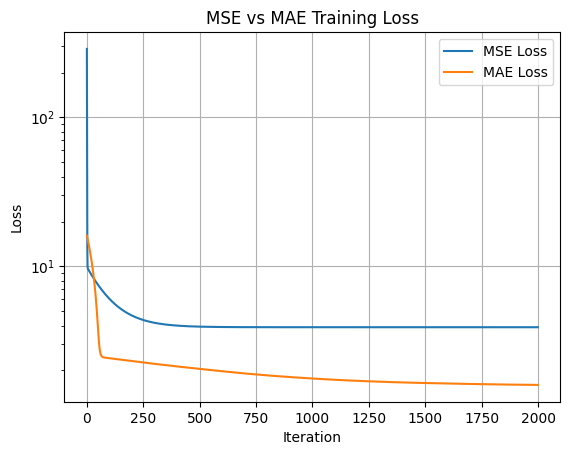

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# Set random seeds
np.random.seed(42)
torch.manual_seed(42)

# Generate synthetic data
m = 1000
X_np = np.random.rand(1, m) * 10
noise = np.random.randn(1, m) * 2
y_np = 2.5 * X_np + 5 + noise

# Convert to tensors
X = torch.tensor(X_np, dtype=torch.float32)
y = torch.tensor(y_np, dtype=torch.float32)

# Hyperparameters
alpha = 0.01
n_iter = 2000

def train_model(X, y, loss_type):
    # Initialize weights and bias
    w = torch.randn(1, 1, requires_grad=True)
    b = torch.randn(1, 1, requires_grad=True)

    losses = []

    for _ in range(n_iter):
        z = w.T @ X + b

        # Loss
        if loss_type == "mse":
            loss = torch.sum((z - y) ** 2) / m
        elif loss_type == "mae":
            loss = torch.sum(torch.abs(z - y)) / m
        else:
            raise ValueError("Invalid loss type")

        losses.append(loss.item())
        loss.backward()

        # Update
        with torch.no_grad():
            w -= alpha * w.grad
            b -= alpha * b.grad

        w.grad.zero_()
        b.grad.zero_()

    return losses, w, b

# Train both models
losses_mse, w_mse, b_mse = train_model(X, y, "mse")
losses_mae, w_mae, b_mae = train_model(X, y, "mae")

# Plot comparison
plt.semilogy(losses_mse, label='MSE Loss')
plt.semilogy(losses_mae, label='MAE Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('MSE vs MAE Training Loss')
plt.legend()
plt.grid(True)
plt.show()
# Print the weights and biases
print("MSE Model: w =", w_mse.detach().numpy(), ", b =", b_mse.detach().numpy())
print("MAE Model: w =", w_mae.detach().numpy(), ", b =", b_mae.detach().numpy())